In [72]:
#These are the libraries that we need
%matplotlib inline
from osgeo import gdal
import os 
import numpy as np
from matplotlib import pyplot as plt


os.chdir('C:\\Geodatascience\\gdal_training\\dem\\results')

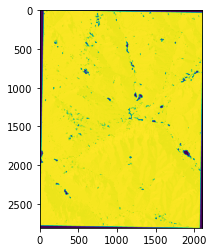

In [73]:

ds=gdal.Open('aspectmap.tif')
gt = ds.GetGeoTransform()
proj = ds.GetProjection()
band = ds.GetRasterBand(1)
array = band.ReadAsArray()
plt.figure()
plt.imshow(array)
plt.show()



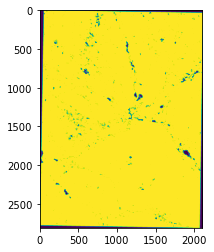

In [74]:
# manipulate
binmask = np.where((array >= np.mean(array)),1,0)
plt.figure()
plt.imshow(binmask)


In [75]:
# export
driver = gdal.GetDriverByName("GTiff")
driver.Register()
outds = driver.Create("binmask.tif", xsize = binmask.shape[1],
                      ysize = binmask.shape[0], bands = 1, 
                      eType = gdal.GDT_Int16)
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outband = outds.GetRasterBand(1)
outband.WriteArray(binmask)
outband.SetNoDataValue(np.nan)
outband.FlushCache()



In [76]:
# close your datasets and bands!!!
outband = None
outds = None